In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the dataset
file_path = "/content/companies_data.csv"
df = pd.read_csv(file_path)

In [7]:
# Remove unnecessary columns
df = df.drop(columns=["Unnamed: 0", "reviews"])

In [8]:
# Convert employee size to numbers
def convert_employee_size(emp):
    if pd.isna(emp):
        return None
    if "10000+" in emp:
        return 10000
    elif "-" in emp:
        low, high = emp.split("-")
        return (int(low.replace(",", "")) + int(high.replace(",", ""))) // 2
    return int(emp.replace(",", ""))

df["employee"] = df["employee"].apply(convert_employee_size)

In [9]:
# Remove missing values
df = df.dropna()

In [10]:
# Convert text data into numbers (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["type", "hq"], drop_first=True)

In [11]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=["name", "rating"])
y = df_encoded["rating"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train an SVM regression model
model = SVR(kernel='rbf', C=10, gamma='scale', epsilon=0.1)
model.fit(X_train, y_train)

SVR(C=10)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [15]:
# Show results
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.06761309101326397
R-squared Score: 0.002908181900268425


In [18]:
print("Actual Ratings:", list(y_test[:90000]))   # Print first 10 actual ratings
print("Predicted Ratings:", list(y_pred[:90000]))  # Print first 10 predicted ratings

Actual Ratings: [3.9, 4.1, 3.9, 3.3, 4.2, 4.3, 4.0, 3.9, 4.1, 3.9, 4.0, 4.0, 4.2, 4.3, 4.1, 4.1, 3.9, 4.1, 4.1, 4.0, 3.9, 4.2, 4.2, 3.9, 3.3, 4.1, 4.0, 4.1, 4.0, 4.0, 4.7, 4.0, 4.2, 4.1, 3.9, 4.1, 4.0, 4.0, 4.1, 4.1, 3.3, 4.0, 3.6, 3.9, 3.6, 3.7, 4.1, 4.1, 4.2, 4.0, 4.2, 3.8, 3.8, 4.3, 4.1, 4.2, 3.9, 3.9, 4.2, 4.2, 3.9, 4.2, 4.0, 3.8, 3.5, 4.1, 3.9, 4.3, 4.1, 3.3, 3.8, 4.0, 3.3, 4.7, 3.5, 4.2, 3.9, 4.1, 4.2, 4.0, 4.3, 3.6, 4.7, 3.9, 4.0, 4.1, 3.8, 3.9, 4.1, 4.3, 3.6, 4.1, 4.1, 3.6, 3.8, 4.0, 4.0, 3.7, 4.2, 4.0, 3.8, 4.0, 4.0, 3.8, 3.9, 4.0, 4.1, 4.1, 4.1, 3.9, 3.9, 4.0, 4.0, 4.1, 3.5, 4.0, 4.0, 4.2, 4.3, 4.1, 3.8, 3.9, 3.8, 3.9, 4.1, 4.0, 4.0, 3.9, 4.2, 4.2, 4.1, 3.6, 4.0, 3.8, 4.0, 4.3, 3.3, 4.0, 4.0, 3.6, 4.1, 3.5, 3.5, 4.0, 3.9, 4.0, 4.1, 4.1, 4.2, 3.9, 3.9, 4.1, 3.9, 4.0, 4.0, 3.9, 3.6, 3.8, 4.3, 4.2, 4.0, 4.1, 3.3, 3.9, 4.0, 4.2, 3.3, 3.3, 4.0, 4.0, 4.0, 3.9, 3.9, 3.9, 3.9, 4.1, 3.9, 4.0, 3.9, 4.2, 3.5, 4.0, 3.9, 3.9, 4.0, 4.7, 4.1, 3.5, 4.1, 4.1, 4.0, 3.3, 3.7, 3.5, 4.0, 4.0, 4.1

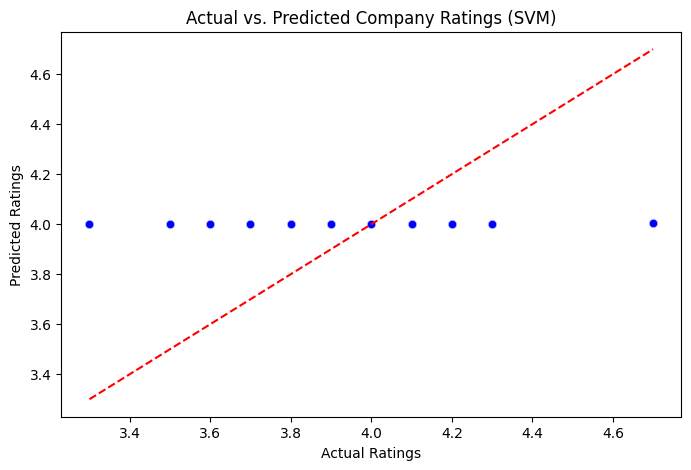

In [16]:
# Plot actual vs. predicted ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Company Ratings (SVM)")
plt.show()

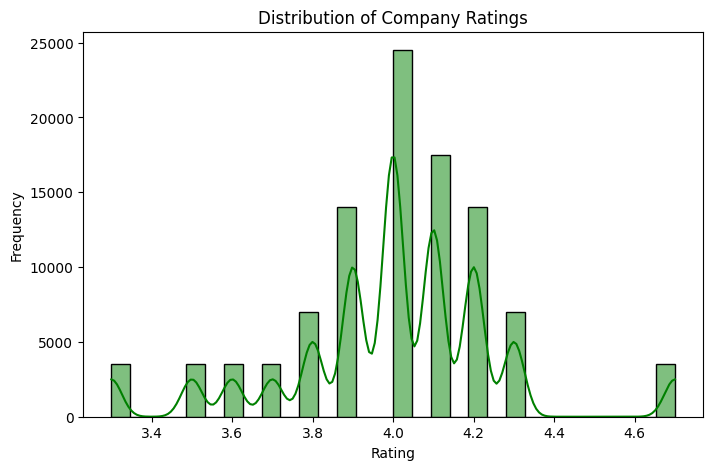

In [19]:
# Histogram of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["rating"], bins=30, kde=True, color="green")
plt.title("Distribution of Company Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

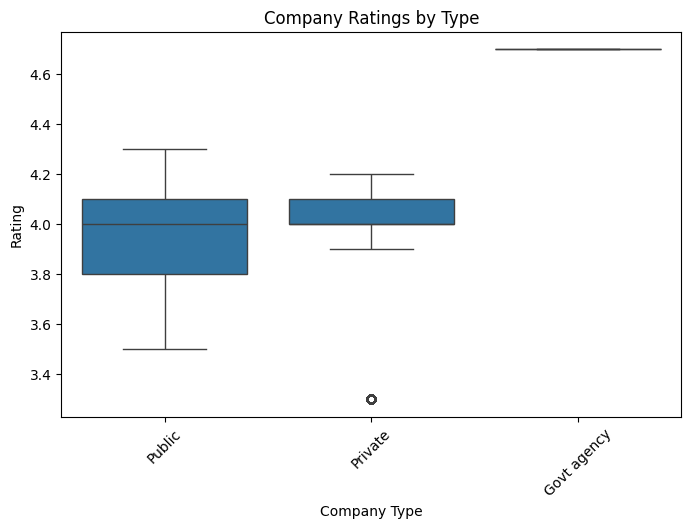

In [20]:
# Boxplot of Ratings by Company Type
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["type"], y=df["rating"])
plt.xticks(rotation=45)
plt.xlabel("Company Type")
plt.ylabel("Rating")
plt.title("Company Ratings by Type")
plt.show()